릿지회귀(L2규제) <br>
일반화성능조절(w)

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

In [54]:
from sklearn.linear_model import Ridge

In [55]:
df = load_diabetes()
x = df['data']
y = df['target']

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state= 777)

In [56]:
scores = [] #평가 저장 받을 장소
weights = [] # 가중치 저장 받을 장소
for a in [10, 1, 0.1, 0.001]:
    model = Ridge(alpha=a)
    model.fit(x_train, y_train)
    scores.append( (a, model.score(x_train, y_train), model.score(x_test, y_test) )) #평가저장
    weights.append( (a, model.coef_) ) #가중치 저장

In [57]:
scores

[(10, 0.15216127293725246, 0.14687325875456547),
 (1, 0.4192861767927082, 0.43949820050759103),
 (0.1, 0.502421784051629, 0.5233070454137285),
 (0.001, 0.5102273601868905, 0.5201219721097312)]

In [58]:
weights

[(10,
  array([ 16.27014589,   5.5378474 ,  58.5370501 ,  43.34872814,
          15.90809853,  11.12964025, -39.04215782,  40.80278925,
          55.91977439,  33.1212854 ])),
 (1,
  array([  33.07667546,  -46.26774993,  269.60501642,  174.79440026,
           15.2798976 ,  -21.25499297, -139.45576095,  122.33909583,
          243.08656416,   90.24663993])),
 (0.1,
  array([   7.69360203, -172.60360971,  490.7823877 ,  273.47740616,
          -58.2161922 ,  -88.9592264 , -167.58455295,  149.6127239 ,
          460.43275626,   40.40454231])),
 (0.001,
  array([  -6.08609011, -213.06523378,  547.35235897,  294.10257523,
         -769.08263375,  433.81472711,  145.71820556,  247.20887269,
          781.67852312,    4.82401849]))]

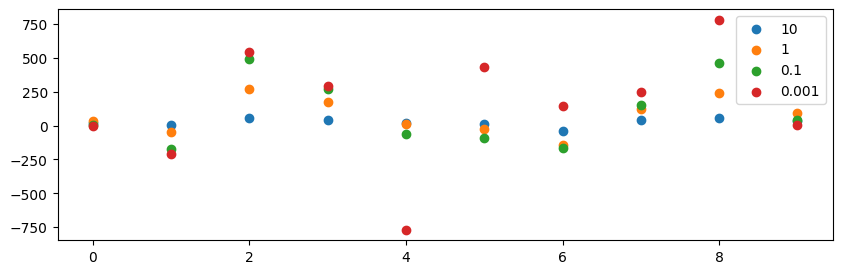

In [59]:
plt.figure(figsize=(10, 3))
for alpha, weight in weights:
    plt.scatter( np.arange(len(weight)), weight, label = str(alpha) )
plt.legend()
plt.show()

라쏘모델훈련(L1규제)

In [60]:
from sklearn.linear_model import Lasso

In [61]:
df = load_diabetes()
x = df['data']
y = df['target']

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state= 777)

In [62]:
scores = [] #평가 저장 받을 장소
weights = [] # 가중치 저장 받을 장소
for a in [1000, 100, 10, 1, 0.1, 0.001]:
    model = Lasso(alpha=a)
    model.fit(x_train, y_train)
    scores.append( (a, model.score(x_train, y_train), model.score(x_test, y_test) )) #평가저장
    weights.append( (a, model.coef_) ) #가중치 저장

In [63]:
scores

[(1000, 0.0, -0.016769168366123077),
 (100, 0.0, -0.016769168366123077),
 (10, 0.0, -0.016769168366123077),
 (1, 0.35581121051254794, 0.36222958791874804),
 (0.1, 0.49996188058610735, 0.5115785441276236),
 (0.001, 0.5102835993723682, 0.5197364206691644)]

In [64]:
weights

[(1000, array([ 0.,  0.,  0.,  0.,  0.,  0., -0.,  0.,  0.,  0.])),
 (100, array([ 0.,  0.,  0.,  0.,  0.,  0., -0.,  0.,  0.,  0.])),
 (10, array([ 0.,  0.,  0.,  0.,  0.,  0., -0.,  0.,  0.,  0.])),
 (1,
  array([  0.        ,   0.        , 366.00354671,   0.        ,
           0.        ,   0.        ,  -0.        ,   0.        ,
         324.64397149,   0.        ])),
 (0.1,
  array([   0.        , -117.53825677,  533.87877526,  241.39745133,
          -48.10511762,   -0.        , -192.27183604,    0.        ,
          534.54611122,    0.        ])),
 (0.001,
  array([  -5.81783961, -213.33804759,  547.42919124,  293.77182137,
         -815.67370739,  471.68464988,  164.59580628,  250.35966646,
          800.41362536,    3.84611611]))]

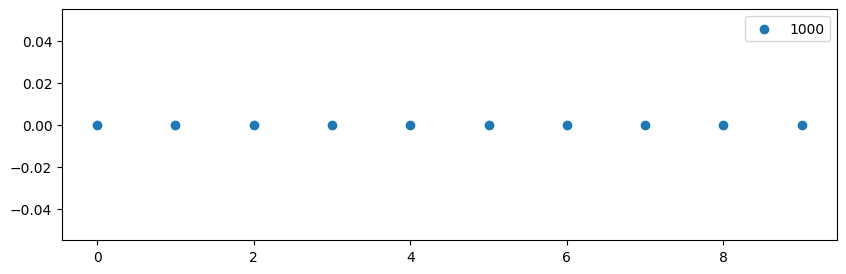

In [65]:
# 규제 10일때의 가중치 시각화 : weights[0]사용
plt.figure(figsize=(10, 3))
plt.scatter( np.arange(len(weights[0][1])), weights[0][1], label = str(weights[0][0]) )
plt.legend()
plt.show()